In [1]:
# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('./../../../')

from src.utils import *
from tqdm import tqdm

from sklearn.model_selection import train_test_split


In [2]:
TAP_df = pd.read_csv('./../../../data/TAP/classification_DS868.csv',sep='\t')

print("% Positive peptides: ", TAP_df['label'].sum()/len(TAP_df))
TAP_df

% Positive peptides:  0.695852534562212


,peptide,source,label,length,overlap
0,AAAAAAAAY,MHCBN; DS613,1,9,Yes
1,AAAAAAADY,DS613,1,9,Yes
2,AAAAAAARY,DS613,1,9,Yes
3,AAAAAAAYY,DS613,1,9,Yes
4,AAAAAADAY,DS613,1,9,Yes
...,...,...,...,...,...
863,VPLRPMT,literature,0,7,No
864,VPLRPMTY,literature,0,8,No
865,VPLRPMTYK,literature,0,9,Yes
866,WISKQEYDESGPSI,literature,0,14,No


Text(0, 0.5, 'Peptide count')

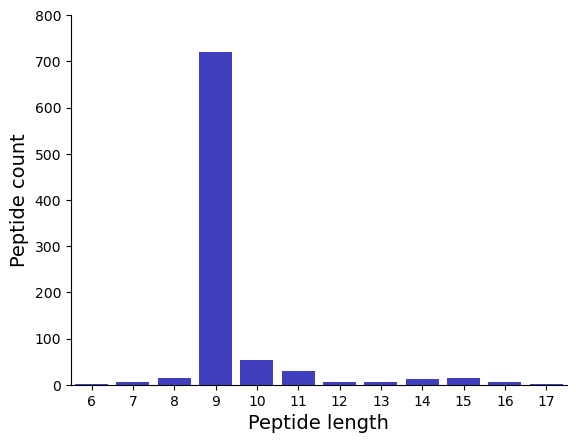

In [3]:
# Plot length distribution
b = sns.countplot(data=TAP_df, x='length',
                 color='blue',saturation=0.5)

sns.despine(top=True, right=True)
b.set(ylim=(0,800))

b.set_xlabel('Peptide length', fontsize=14)
b.set_ylabel('Peptide count', fontsize=14)

# Make X and y

In [4]:
with open('./../../../data/TAP/classification_peptides_esm1b.pkl','rb') as f:
    peptide_embeddings_dict = pickle.load(f)
f.close()

peptide_embeddings_dict

{'AAAAAAAAY': tensor([[-0.0898,  0.0043,  0.0171,  ..., -0.1176, -0.0112,  0.0208]]),
 'AAAAAAADY': tensor([[-0.0662,  0.0032,  0.0521,  ..., -0.1340, -0.0303,  0.0614]]),
 'AAAAAAARY': tensor([[-0.0455,  0.0704,  0.0478,  ..., -0.0493,  0.0200, -0.0117]]),
 'AAAAAAAYY': tensor([[-0.0575,  0.0602, -0.0203,  ..., -0.1418,  0.0320, -0.0739]]),
 'AAAAAADAY': tensor([[-0.1078,  0.0160,  0.0112,  ..., -0.1025,  0.0066,  0.0092]]),
 'AAAAAARAY': tensor([[-0.0656,  0.0362,  0.0543,  ..., -0.0371,  0.0098,  0.0164]]),
 'AAAAAAYAY': tensor([[-0.0595,  0.0325,  0.0099,  ..., -0.1531, -0.0032, -0.0304]]),
 'AAAAADAAY': tensor([[-0.1369,  0.0279,  0.0091,  ..., -0.1147, -0.0082,  0.0130]]),
 'AAAAARAAY': tensor([[-0.0888,  0.0649,  0.0426,  ..., -0.0378,  0.0032, -0.0024]]),
 'AAAAAYAAY': tensor([[-0.0773,  0.0226, -0.0114,  ..., -0.1429, -0.0080, -0.0321]]),
 'AAAADAAAY': tensor([[-0.1515,  0.0134,  0.0146,  ..., -0.1324,  0.0020,  0.0191]]),
 'AAAARAAAY': tensor([[-0.0817,  0.0810,  0.0389,  ...

In [8]:
peptide_embeddings_dict['AAAAAARAY']

tensor([[-0.0656,  0.0362,  0.0543,  ..., -0.0371,  0.0098,  0.0164]])

In [22]:
## X 
X = torch.stack([peptide_embeddings_dict[p] for p in TAP_df['peptide'].to_list()])
with open('./../../../data/TAP/X.pkl','wb') as f:
    pickle.dump(X, f)
f.close()


# labels 
y = TAP_df['label'].to_numpy()
with open('./../../../data/TAP/y.pkl','wb') as f:
    pickle.dump(y, f)
f.close()


In [15]:
# from sklearn.preprocessing import StandardScaler

# load X and y
with open('./../../../data/TAP/X.pkl','rb') as f:
    X = pickle.load(f)
f.close()

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.squeeze())

In [25]:
TAP_df

,peptide,source,label,length,overlap
0,AAAAAAAAY,MHCBN; DS613,1,9,Yes
1,AAAAAAADY,DS613,1,9,Yes
2,AAAAAAARY,DS613,1,9,Yes
3,AAAAAAAYY,DS613,1,9,Yes
4,AAAAAADAY,DS613,1,9,Yes
...,...,...,...,...,...
863,VPLRPMT,literature,0,7,No
864,VPLRPMTY,literature,0,8,No
865,VPLRPMTYK,literature,0,9,Yes
866,WISKQEYDESGPSI,literature,0,14,No
